<a href="https://colab.research.google.com/github/RafaelMoreno13/ED_1/blob/main/centros_penitenciarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cargar las librerias

In [ ]:
%config IPCompleter.greedy=True
import pandas as pd
import os
import numpy as np
import xlrd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

Cargar base de datos

In [ ]:
from google.colab import files

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/DATOS/Base de datos.xlsx')
df.shape

(32, 9)

In [ ]:
df.head(37)

,Nivel\nde gobierno,Clave,Entidad federativa,POBLACIÓN,Total,Individuales,Colectivas,No especificado,MEDIA
0,Estatal,1,Aguascalientes,1273404,796,34,762,0,265.333333
1,Estatal,2,Baja California,3443792,2170,64,2106,0,723.333333
2,Estatal,3,Baja California Sur,745601,443,124,319,0,147.666667
3,Estatal,4,Campeche,897291,311,48,263,0,103.666667
4,Estatal,5,Coahuila de Zaragoza,2932657,1041,151,890,0,347.000000
5,Estatal,6,Colima,713612,416,15,401,0,138.666667
6,Estatal,7,Chiapas,5200849,1061,0,1061,0,353.666667
7,Estatal,8,Chihuahua,3681473,6017,1136,4881,0,2005.666667
8,Estatal,9,Ciudad de México,8870622,5080,228,4852,0,1693.333333
9,Estatal,10,Durango,1750791,579,8,571,0,193.000000


In [ ]:
df.tail()

,Nivel\nde gobierno,Clave,Entidad federativa,POBLACIÓN,Total,Individuales,Colectivas,No especificado,MEDIA
27,Estatal,28,Tamaulipas,3511463,1382,0,1382,0,460.666667
28,Estatal,29,Tlaxcala,1265055,246,12,234,0,82.000000
29,Estatal,30,Veracruz de Ignacio de la Llave,7998824,1241,337,904,0,413.666667
30,Estatal,31,Yucatán,2097203,961,216,745,0,320.333333
31,Estatal,32,Zacatecas,1566089,1542,7,1535,0,514.000000


In [ ]:
df.describe()

,Clave,POBLACIÓN,Total,Individuales,Colectivas,No especificado,MEDIA
count,32.000000,3.200000e+01,32.000000,32.000000,32.000000,32.0,32.000000
mean,16.500000,3.749690e+06,1621.250000,157.531250,1463.718750,0.0,540.416667
std,9.380832,3.195336e+06,1436.797088,254.364481,1314.404912,0.0,478.932363
min,1.000000,7.136120e+05,246.000000,0.000000,234.000000,0.0,82.000000
25%,8.750000,1.704616e+06,744.000000,8.000000,705.750000,0.0,248.000000
50%,16.500000,2.916753e+06,1180.000000,65.000000,958.000000,0.0,393.333333
75%,24.250000,4.685442e+06,2079.250000,214.500000,1836.500000,0.0,693.083333
max,32.000000,1.667210e+07,6017.000000,1136.000000,5424.000000,0.0,2005.666667


In [ ]:
df.describe(include='all')

,Nivel\nde gobierno,Clave,Entidad federativa,POBLACIÓN,Total,Individuales,Colectivas,No especificado,MEDIA
count,32,32.000000,32,3.200000e+01,32.000000,32.000000,32.000000,32.0,32.000000
unique,1,NaN,32,NaN,NaN,NaN,NaN,NaN,NaN
top,Estatal,NaN,Aguascalientes,NaN,NaN,NaN,NaN,NaN,NaN
freq,32,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,16.500000,NaN,3.749690e+06,1621.250000,157.531250,1463.718750,0.0,540.416667
std,NaN,9.380832,NaN,3.195336e+06,1436.797088,254.364481,1314.404912,0.0,478.932363
min,NaN,1.000000,NaN,7.136120e+05,246.000000,0.000000,234.000000,0.0,82.000000
25%,NaN,8.750000,NaN,1.704616e+06,744.000000,8.000000,705.750000,0.0,248.000000
50%,NaN,16.500000,NaN,2.916753e+06,1180.000000,65.000000,958.000000,0.0,393.333333
75%,NaN,24.250000,NaN,4.685442e+06,2079.250000,214.500000,1836.500000,0.0,693.083333


In [ ]:
df['Entidad federativa'].describe()

count                 32
unique                32
top       Aguascalientes
freq                   1
Name: Entidad federativa, dtype: object

In [ ]:
df['Nivel\nde gobierno'].unique()

array(['Estatal'], dtype=object)

Importar Librerias

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Importar Graficas

In [ ]:
#Indicame el máximo
df['POBLACIÓN'].max()

16672099

In [ ]:
#Indicame la media
df['POBLACIÓN'].mean()

3749689.78125

In [ ]:
#Indicame un análisis de frecuencias
#Lo que vemos son los datos más repetidos "Moda"
df['POBLACIÓN'].value_counts()

1273404     1
3443792     1
2097203     1
7998824     1
1265055     1
3511463     1
2364632     1
2900849     1
2965379     1
2733708     1
1539101     1
1980225     1
6144886     1
3991911     1
5028766     1
1206119     1
1902329     1
4571000     1
16672099    1
7857979     1
2850714     1
3551527     1
5780123     1
1750791     1
8870622     1
3681473     1
5200849     1
713612      1
2932657     1
897291      1
745601      1
1566089     1
Name: POBLACIÓN, dtype: int64

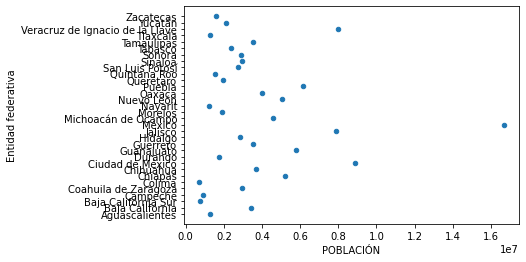

In [ ]:
#Diagrama de lineas 
df.plot.scatter(x= 'POBLACIÓN' ,y = 'Entidad federativa')

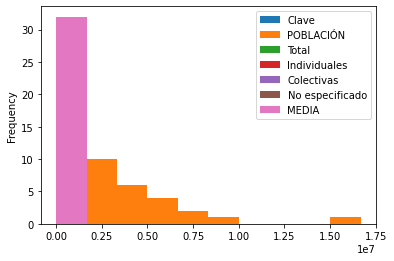

In [ ]:
#Realizar histograma
df.plot.hist()

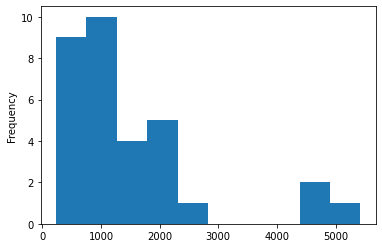

In [ ]:
df['Colectivas'].plot.hist()

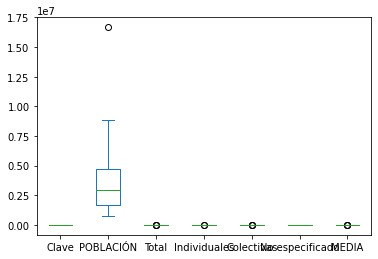

In [ ]:
#Diagramas de caja //Mayor dispersión entre el cuartil de incidentes.
df.plot.box()

Aguascalientes                          AxesSubplot(0.1,0.792857;0.114286x0.107143)
Baja California                    AxesSubplot(0.237143,0.792857;0.114286x0.107143)
Baja California Sur                AxesSubplot(0.374286,0.792857;0.114286x0.107143)
Campeche                           AxesSubplot(0.511429,0.792857;0.114286x0.107143)
Chiapas                            AxesSubplot(0.648571,0.792857;0.114286x0.107143)
Chihuahua                          AxesSubplot(0.785714,0.792857;0.114286x0.107143)
Ciudad de México                        AxesSubplot(0.1,0.664286;0.114286x0.107143)
Coahuila de Zaragoza               AxesSubplot(0.237143,0.664286;0.114286x0.107143)
Colima                             AxesSubplot(0.374286,0.664286;0.114286x0.107143)
Durango                            AxesSubplot(0.511429,0.664286;0.114286x0.107143)
Guanajuato                         AxesSubplot(0.648571,0.664286;0.114286x0.107143)
Guerrero                           AxesSubplot(0.785714,0.664286;0.114286x0.

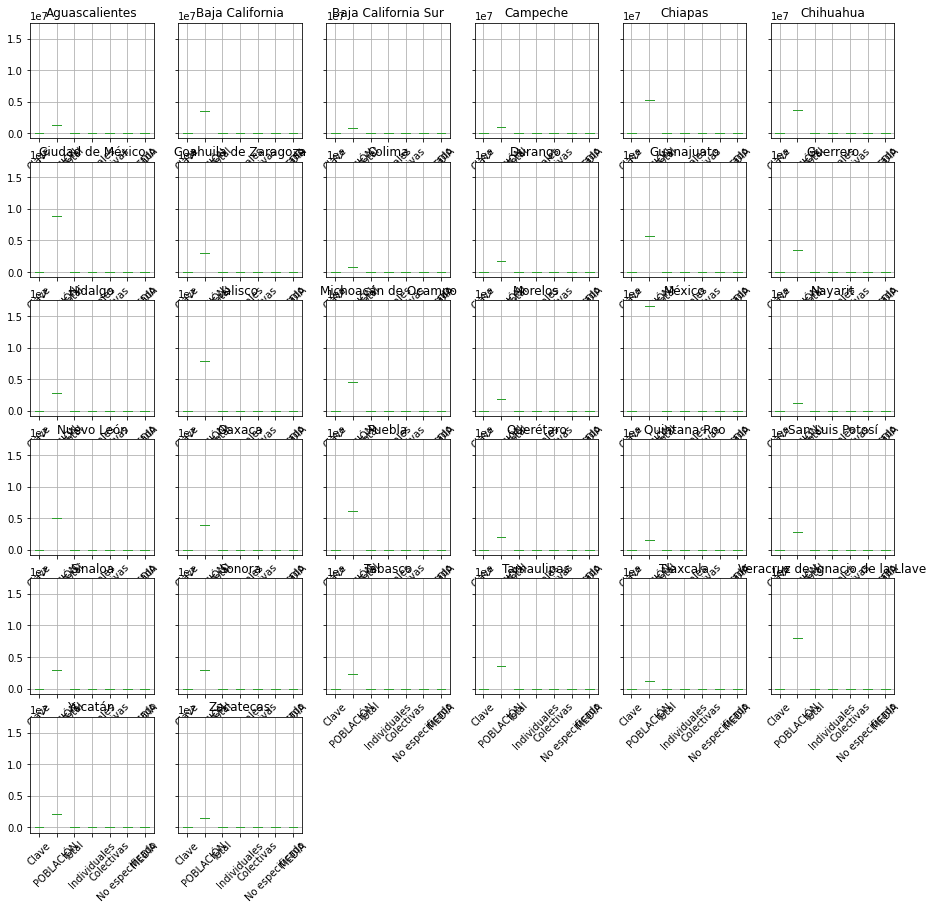

In [ ]:
df.groupby('Entidad federativa').boxplot(figsize=(15,15),rot= 45)

In [ ]:
#Tabla pivote
tabla = pd.pivot_table(df,values = 'Entidad federativa', index= 'POBLACIÓN', aggfunc= np.mean)
tabla

/usr/local/lib/python3.7/dist-packages/pandas/core/groupby/generic.py:979: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  result = op.agg()


""
POBLACIÓN
713612
745601
897291
1206119
1265055
1273404
1539101
1566089
1750791
